### Fraktaler generert av Newtons metode 

I denne notebooken har jeg utforsket litt hvordan newtons metode fungerer på komplekse polynomer for å fine nullpunkr. En morsom konsekvens er at det genereres fraktaler jo større og detaqljert du gjør grid-et. Antar at funksjonen er et polynom med røtter. Dette gjør det lettere å gjenkjenne nullpunkt. Alle polynomene har røtter med orden 1. 

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import optimize

In [32]:
def newton(function, derivative, roots, guess, tol): 
    """
    newton's metode for å finne nullpunkt 
    input: 
        -Function: funksjonsutrykk
        -derivative: den dereverte av funksjonen
        -roots: røttene til funksjonen
        -tol: toleranse for konvergens
    output:
        -guess: rot funnet av newton's metode 
    """
    step = 0
    while(min(abs(roots-guess)) > tol or step < 50): 
        guess = guess - function(guess, roots)/derivative(guess, roots)
        step +=1 
    
    return guess

def polynomial(z, roots):
    poly = 1 + 0j
    for i in range(len(roots)):
        poly *= (z - roots[i])
    return poly

def diff_polynomial(z, roots):
    diff = 0 + 0j
    for i in range(len(roots)):
        diff += polynomial(z, np.delete(np.copy(roots), i))
    return diff


In [33]:
N = 500
roots = np.array([-np.sqrt(2)/2 - np.sqrt(2)/2j, np.sqrt(2)/2 - np.sqrt(2)/2j , -np.sqrt(2)/2 + np.sqrt(2)/2j, np.sqrt(2)/2 + np.sqrt(2)/2j])
x = np.linspace(-2, 2, N)
y = np.linspace(-2j,2j, N)
color = np.zeros((N, N))
for i in range(len(x)):
    for j in range(len(y)):
        guess = newton(polynomial, diff_polynomial, roots, x[i] + y[j], 1e-8)
        color[i][j] =  np.argmin(abs(roots - guess))

np.savetxt('color.txt', color, fmt = '%d')

In [34]:
color_1000 = color
np.shape(color_1000)

(500, 500)

[-0.70710678+0.70710678j  0.70710678+0.70710678j -0.70710678-0.70710678j
  0.70710678-0.70710678j]
[1. 1. 1. 1.]


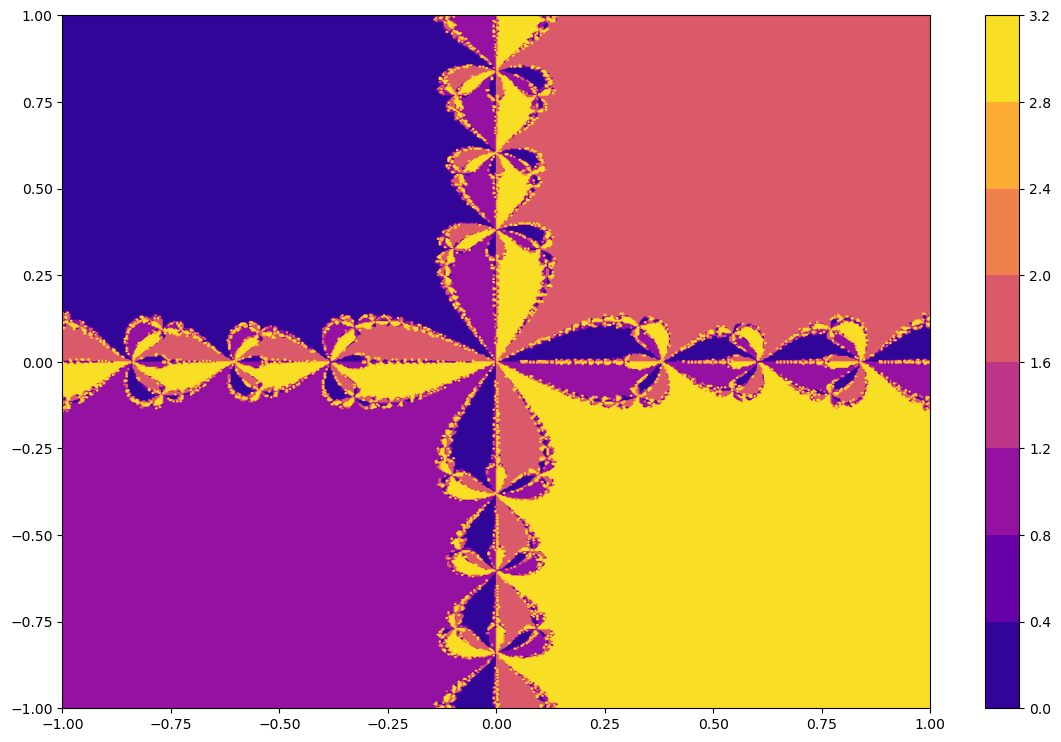

In [35]:
print(roots)
print(abs(roots))
plt.figure(figsize = (14,9))

x = np.linspace(-1, 1, N)
y = np.linspace(-1j,1j, N)
plt.contourf(-x,-y.imag, color, cmap = plt.cm.plasma)

plt.colorbar()
plt.show()

In [36]:
N = 500
roots = np.array([-1 - 1j, 1 - 1j , -1 + 1j, 1 + 1j,0])
x = np.linspace(-2, 2, N)
y = np.linspace(-2j,2j, N)
color1 = np.zeros((N, N))
color2 = np.zeros((N, N))
for i in range(len(x)):
    for j in range(len(y)):
        guess = newton(polynomial, diff_polynomial, roots, x[i] + y[j], 1e-8)
        color1[i][j] =  np.argmin(abs(roots - guess))
        color2[i][j] = abs(guess)
        

[-1.-1.j  1.-1.j -1.+1.j  1.+1.j  0.+0.j]
[1.41421356 1.41421356 1.41421356 1.41421356 0.        ]


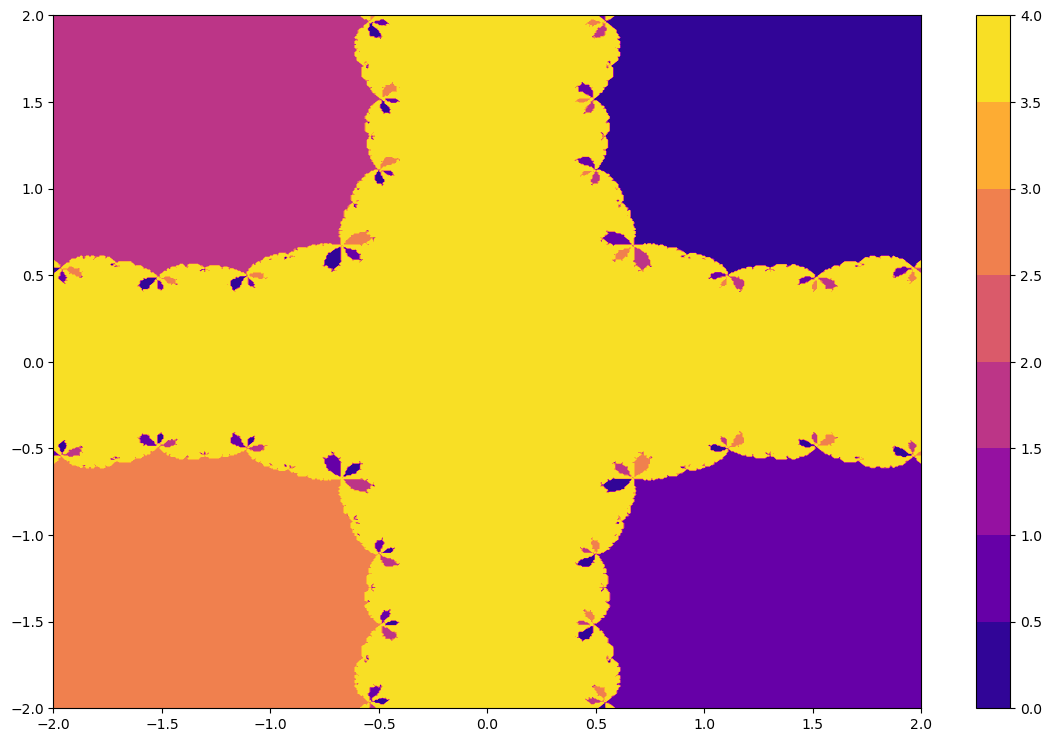

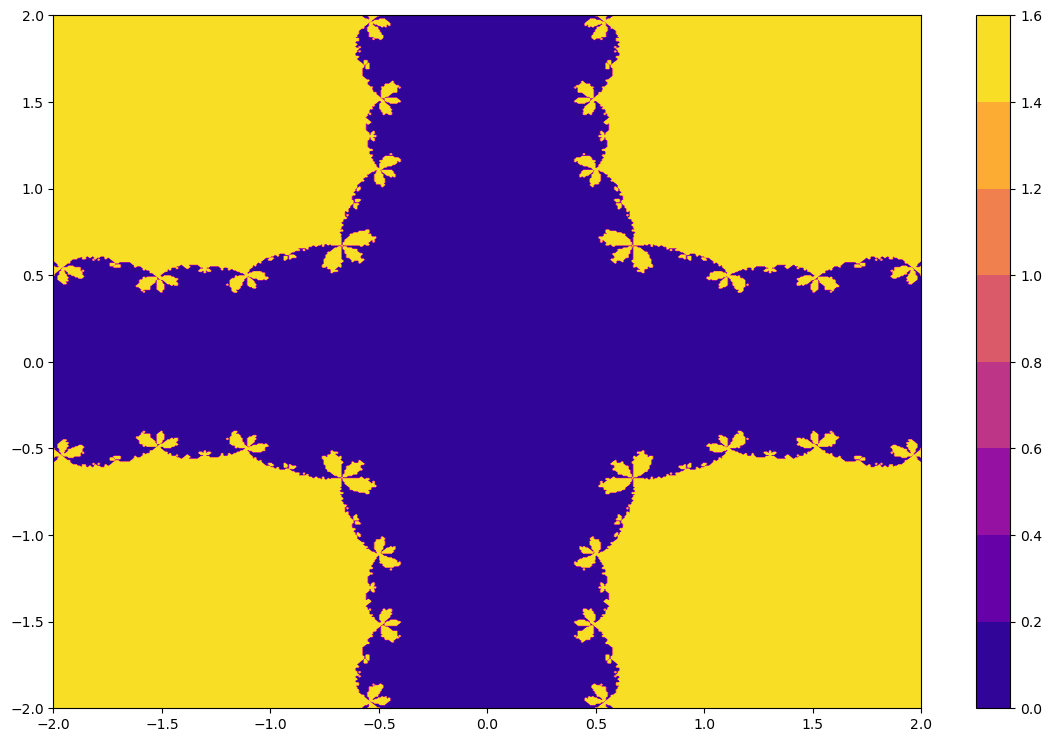

In [37]:
print(roots)
print(abs(roots))
plt.figure(figsize = (14,9))
plt.contourf(-x,-y.imag, color1, cmap = plt.cm.plasma)
plt.colorbar()

plt.figure(figsize = (14,9))
plt.contourf(-x,-y.imag, color2, cmap = plt.cm.plasma)
plt.colorbar()
